# Song Dynasty Paintings Database

Last updated August 28th 2021

## Total entries in the database

In [11]:
import pandas as pd
import matplotlib.pylab as plt

csv_path="https://raw.githubusercontent.com/caomengge/Song-Dynasty-Paintings-Database/master/SongPaintingData_APR15.csv"
df=pd.read_csv(csv_path)

1463


## Database overview

In [43]:
print(df.dtypes)
print("Total entries:", len(df))
df.head(5)

ID                           int64
Title                       object
Dynasty                     object
Artist                      object
Format                      object
Material                    object
H                          float64
W                          float64
A                          float64
Size                        object
Institute                   object
Nationality                 object
Source                      object
Note                        object
Seals and Inscriptions      object
Set                         object
Tag1                        object
Tag2                        object
Tag3                        object
Tag4                        object
W-binned                  category
dtype: object
Total entries: 1463


,ID,Title,Dynasty,Artist,Format,Material,H,W,A,Size,...,Nationality,Source,Note,Seals and Inscriptions,Set,Tag1,Tag2,Tag3,Tag4,W-binned
0,1,溪山行旅,SS2,傳 范寬,squarish 方幅,Silk 絹本,23.9,25.5,609.45,S,...,USA,Museum Website,NaN,NaN,NaN,landscape,NaN,figure,NaN,Small
1,2,瀟湘八景圖1,SS2,傳 王洪,handscroll 卷,Silk 絹本,23.4,90.7,2122.38,M,...,USA,宋畫全集第六卷第六冊,NaN,NaN,瀟湘八景圖四段,NaN,NaN,NaN,NaN,Medium
2,3,瀟湘八景圖2,SS2,傳 王洪,handscroll 卷,Silk 絹本,23.4,90.7,2122.38,M,...,USA,宋畫全集第六卷第六冊,NaN,NaN,瀟湘八景圖四段,NaN,NaN,NaN,NaN,Medium
3,4,瀟湘八景圖3,SS2,傳 王洪,handscroll 卷,Silk 絹本,23.4,90.7,2122.38,M,...,USA,宋畫全集第六卷第六冊,NaN,NaN,瀟湘八景圖四段,NaN,NaN,NaN,NaN,Medium
4,5,瀟湘八景圖4,SS2,傳 王洪,handscroll 卷,Silk 絹本,23.4,90.7,2122.38,M,...,USA,宋畫全集第六卷第六冊,NaN,NaN,瀟湘八景圖四段,NaN,NaN,NaN,NaN,Medium


## Distribution of Painting Area

Text(0.5, 1.0, 'Distribution of Painting Area')

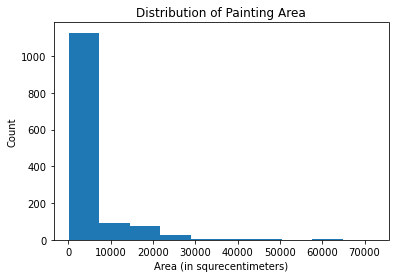

In [17]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["A"])

# set x/y labels and plot title
plt.pyplot.xlabel("Area (in squrecentimeters)")
plt.pyplot.ylabel("Count")
plt.pyplot.title("Distribution of Painting Area")

## Display paintings with both width and height under 55 cm.

In [47]:
df2 = df[df['W'].between (0, 55, inclusive=False)] 
df3 = df2[df2['H'].between(0,55, inclusive=False)]
print (df3[['Title','W','H']])

                              Title     W     H
0                              溪山行旅  25.5  23.9
6                               寒塘圖  25.7  24.6
10    Mountain Terrace and Pavilion  24.6  24.6
11                     Winter Scene  24.0  24.0
12                              戲猿圖  26.5  24.8
...                             ...   ...   ...
1450                           楊柳乳雀  24.8  24.8
1451                             梅雀  29.0  25.5
1452                           竹樹馴雀  24.8  24.8
1453                           山茶宿鳥  25.6  24.3
1462                           嫩柳栖鴉  25.4  24.3

[693 rows x 3 columns]


## Binning Painting Sizes based on Width

In [35]:
# 55 cm is one standardized silk-width

bins = (min(df['W']),55, 110, 220, max(df['W'])) 
group_names = ['Small', 'Medium', 'Large', 'Extra-Large/Long']
df['W-binned'] = pd.cut(df['W'], bins, labels=group_names, include_lowest=True )
df[['Title','W','W-binned']].head(20)

,Title,W,W-binned
0,溪山行旅,25.5,Small
1,瀟湘八景圖1,90.7,Medium
2,瀟湘八景圖2,90.7,Medium
3,瀟湘八景圖3,90.7,Medium
4,瀟湘八景圖4,90.7,Medium
5,山水圖,48.4,Small
6,寒塘圖,25.7,Small
7,仿周文矩 宮中圖,177.0,Large
8,山水舟遊,85.2,Medium
9,陳風圖,739.0,Extra-Large/Long


## Distribution of Paintings by Sizes

In [36]:
df["W-binned"].value_counts()

Small               966
Medium              190
Extra-Large/Long     95
Large                90
Name: W-binned, dtype: int64

Text(0.5, 1.0, 'Painting Width bins')

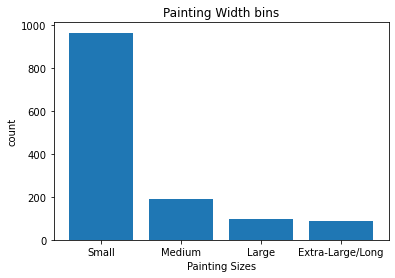

In [37]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["W-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("Painting Sizes")
plt.pyplot.ylabel("count")
plt.pyplot.title("Painting Width bins")

## Approximate Date Tags

In [45]:
df['Dynasty'].value_counts()

SS2    382
SS1    302
SS0    171
NS1     58
NS2     55
Y        7
SS       5
NS0      4
NS       2
Ss2      1
Name: Dynasty, dtype: int64